# Using Jupyter to Query the WRDS Database

In [1]:
### The following commands install and import WRDS 

In [31]:
pip install wrds

Note: you may need to restart the kernel to use updated packages.


In [32]:
import wrds

In [33]:
## The following command defines the function of our wrds connection.You can replace "db" with any text. 
## Then login with your WRDS username and password when prompted. Creating a .pgpass file is recommended.

In [4]:
db = wrds.Connection()

Enter your WRDS username [jovyan]:pei05lun
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [18]:
## This imports a few commonly used python libraries.

In [34]:
import pandas as pd
import numpy as np
import datetime as dt
import psycopg2 
import matplotlib.pyplot as plt

In [35]:
## The following lists all WRDS products we have subscriptions for.These can also be explored using the web interface.

In [36]:
db.list_libraries()

['aha_sample',
 'ahasamp',
 'audit',
 'audit_audit_comp',
 'audit_common',
 'audit_corp_legal',
 'auditsmp',
 'auditsmp_all',
 'block',
 'block_all',
 'boardex',
 'boardex_na',
 'boardex_trial',
 'boardsmp',
 'bvd',
 'bvd_ama_large',
 'bvd_ama_medium',
 'bvd_ama_small',
 'bvd_ama_verylarge',
 'bvd_orbis_large',
 'bvd_orbis_medium',
 'bvd_orbis_small',
 'calcbench_trial',
 'calcbnch',
 'cboe',
 'cboe_all',
 'ciqsamp',
 'ciqsamp_common',
 'ciqsamp_transcripts',
 'columnar',
 'comp',
 'comp_bank',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global',
 'comp_global_daily',
 'comp_na_annual_all',
 'comp_na_daily_all',
 'comp_na_monthly_all',
 'comp_segments_hist',
 'comp_segments_hist_daily',
 'comp_urq',
 'compa',
 'compb',
 'compg',
 'comph',
 'compm',
 'compsamp_snapshot',
 'compseg',
 'contrib',
 'contrib_ceo_turnover',
 'contrib_char_returns',
 'contrib_general',
 'contrib_intangible_value',
 'contrib_kpss',
 'contrib_liva',
 'crsp',
 'crsp_a_ccm',
 'crsp_a_indexes',
 'crsp_a_stock',


In [50]:
## The following commands list and describe the tables in the djones_all library.
## The web version can be found at: https://wrds-www.wharton.upenn.edu/pages/get-data/dow-jones-averages-total-return-indexes/

In [8]:
db.list_tables(library='djones_all')

['djdaily', 'djmonthly']

In [38]:
db.describe_table(library='djones_all', table='djmonthly')

Approximately 2429 rows in djones_all.djmonthly.


,name,nullable,type,comment
0,date,True,DATE,Date
1,djc,True,DOUBLE_PRECISION,Composite Close
2,djct,True,DOUBLE_PRECISION,Composite Total Return Close
3,dji,True,DOUBLE_PRECISION,Industrial Close
4,djit,True,DOUBLE_PRECISION,Industrial Total Return Close
5,djt,True,DOUBLE_PRECISION,Transportation Close
6,djtt,True,DOUBLE_PRECISION,Transportation Total Return Close
7,dju,True,DOUBLE_PRECISION,Utility Close
8,djut,True,DOUBLE_PRECISION,Utility Total Return Close
9,d10,True,DOUBLE_PRECISION,Industrial Average 10 Close


In [44]:
## This script calls all Dow Jones monthly index data starting from 2000-01-01.
all_data = db.raw_sql("select * FROM djones.djmonthly WHERE date>'2000-01-01'")
all_data

,date,djc,djct,dji,djit,djt,djtt,dju,djut,d10,d10t,d5,d5t
0,2000-01-26,NaN,NaN,11032.99,15473.31,2664.79,3231.05,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.96,1350.59,888.29,1447.55
2,2000-02-01,3101.97,4415.75,NaN,NaN,NaN,NaN,312.95,653.55,NaN,NaN,NaN,NaN
3,2000-02-25,NaN,NaN,9862.12,13854.48,2351.26,2856.76,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.31,1216.67,780.20,1272.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2008-04-25,NaN,NaN,12891.86,21494.95,5117.37,6846.16,NaN,NaN,NaN,NaN,NaN,NaN
243,2008-05-01,4543.16,7717.15,NaN,NaN,NaN,NaN,516.84,1456.23,NaN,NaN,NaN,NaN
244,2008-05-23,NaN,NaN,12479.63,20876.01,5145.14,6894.79,NaN,NaN,NaN,NaN,NaN,NaN
245,2008-05-30,4514.44,7690.14,NaN,NaN,NaN,NaN,521.65,1476.33,NaN,NaN,NaN,NaN


In [51]:
## This calls the first 100 days of the Dow Jones Industial averages. 
dow_jones_index = db.raw_sql('SELECT date, dji FROM djones.djdaily LIMIT 100')
dow_jones_index

,date,dji
0,1896-05-26,40.94
1,1896-05-27,40.58
2,1896-05-28,40.20
3,1896-05-29,40.63
4,1896-06-01,40.60
...,...,...
95,1896-10-07,35.30
96,1896-10-08,35.42
97,1896-10-09,34.96
98,1896-10-12,34.74


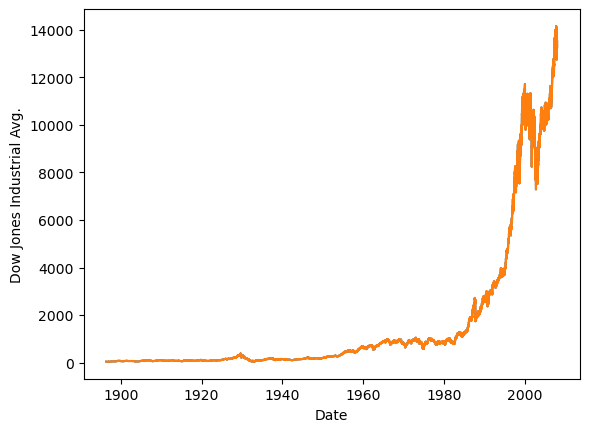

In [16]:
## This plot shows the history of the Dow Jones Industrials. 
## Note that the data from this library ceases in 2008 
data = db.raw_sql("select date,dji from djones.djdaily WHERE date < '2008-01-01'", date_cols=['date'], index_col=['date'])
plt.plot(data),
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Dow Jones Industrial Avg.')
plt.show()

In [55]:
#This script extracts the first 10 observations from the Compustat Library (comp) company table.
company = db.get_table(library='comp', table='company',obs=10)
company

,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,A & E PLASTIK PAK INC,001000,None,None,None,None,None,None,None,None,...,01,3089,325.0,978.0,None,None,0.0,None,1978-06-30,None
1,A & M FOOD SERVICES INC,001001,1924 South Utica Avenue,None,None,None,94104,None,0000723576,Tulsa,...,01,5812,420.0,978.0,None,OK,0.0,None,1986-07-31,None
2,AAI CORP,001002,124 Industry Lane,None,None,None,21030-0126,"Textron Systems Corporation designs, develops,...",0001306124,Hunt Valley,...,01,3825,230.0,940.0,None,MD,0.0,www.textronsystems.com,1977-03-31,None
3,A.A. IMPORTING CO INC,001003,7700 Hall Street,None,None,None,63125,"A.A. Importing Company, Inc. designs, manufact...",0000730052,St. Louis,...,01,5712,449.0,976.0,None,MO,3.0,www.aaimporting.com,1992-04-30,None
4,AAR CORP,001004,"One AAR Place, 1100 North Wood Dale Road",None,None,None,60191,AAR Corp. provides products and services to co...,0000001750,Wood Dale,...,01,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,None,1988-01-01
5,A.B.A. INDUSTRIES INC,001005,10260 US Highway 19 North,None,None,None,33782,A.B.A. Industries Inc. was acquired by McSwain...,None,Pinellas Park,...,01,3724,110.0,925.0,None,FL,0.0,None,1983-01-31,None
6,ABC INDS INC,001006,301 Kings Highway,None,None,None,46590,"ABC Industries, Inc. manufactures and supplies...",None,Winona Lake,...,01,2711,415.0,976.0,None,IN,3.0,www.abc-industries.net,1983-06-30,None
7,ABKCO INDUSTRIES INC,001007,"1700 Broadway, Suite 41",None,None,None,10019,"ABKCO Music & Records, Inc. operates as an ent...",0000001882,New York,...,01,3652,220.0,925.0,None,NY,3.0,www.abkco.com,1986-12-31,None
8,ABM COMPUTER SYSTEMS INC,001008,3 Whatney,None,None,None,92714,None,None,Irvine,...,01,3577,188.0,940.0,None,CA,0.0,None,1987-10-31,None
9,ABS INDUSTRIES INC,001009,"Interstate Square, Suite 300",None,None,None,44904,"Makes cold and warm forgings, including transm...",0000313368,Willoughby,...,01,3460,355.0,925.0,None,OH,3.0,None,1996-12-31,None


In [66]:
##Same Query but narrows down to specific columns
company_narrow = db.get_table(library='comp', table='company', columns = ['conm', 'gvkey', 'sic', 'cik'], obs=5)
company_narrow

,conm,gvkey,sic,cik
0,A & E PLASTIK PAK INC,001000,3089,None
1,A & M FOOD SERVICES INC,001001,5812,0000723576
2,AAI CORP,001002,3825,0001306124
3,A.A. IMPORTING CO INC,001003,5712,0000730052
4,AAR CORP,001004,5080,0000001750


In [67]:
## This is a geeky join command from two compustat libraries. Joining data sets is your economics data superpower  
db.raw_sql("""
    SELECT a.gvkey, a.datadate, a.tic, a.conm, a.at, a.lt, b.prccm, b.cshoq
    FROM comp.funda a
    JOIN comp.secm b ON a.gvkey = b.gvkey AND a.datadate = b.datadate
    WHERE a.tic = 'IBM' AND a.datafmt = 'STD' AND a.consol = 'C' AND a.indfmt = 'INDL'
""")

,gvkey,datadate,tic,conm,at,lt,prccm,cshoq
0,006066,1962-12-31,IBM,INTL BUSINESS MACHINES CORP,2112.301,731.700,389.999567,NaN
1,006066,1963-12-31,IBM,INTL BUSINESS MACHINES CORP,2373.857,782.119,506.999353,NaN
2,006066,1964-12-31,IBM,INTL BUSINESS MACHINES CORP,3309.152,1055.072,409.499496,NaN
3,006066,1965-12-31,IBM,INTL BUSINESS MACHINES CORP,3744.917,1166.771,498.999146,NaN
4,006066,1966-12-31,IBM,INTL BUSINESS MACHINES CORP,4660.777,1338.149,371.499662,NaN
...,...,...,...,...,...,...,...,...
56,006066,2017-12-31,IBM,INTL BUSINESS MACHINES CORP,125356.000,107631.000,153.420000,922.179
57,006066,2018-12-31,IBM,INTL BUSINESS MACHINES CORP,123382.000,106453.000,113.670000,892.479
58,006066,2019-12-31,IBM,INTL BUSINESS MACHINES CORP,152186.000,131201.000,134.040000,887.110
59,006066,2020-12-31,IBM,INTL BUSINESS MACHINES CORP,155971.000,135244.000,125.880000,892.653
